# If you can code. you can do statistics.

Introduction:

In this series of blog posts, I’ll talk about some techniques we can use to answer statistical questions without any knowledge of statistics.
We will go through some statistics&probability problems and answer them computationally(using code). And maybe compare that with the analytical solution.

We also will address the pros and cons of this approach.

In [6]:
# hide_input
# This cell is required for the export to HTML to work.
import plotly.express as px
import plotly.io as pio

# Default is plotly_mimetype+notebook, but jekyll fails to parse plotly_mimetype.
pio.renderers.default = 'notebook_connected'
# Uncomment below to avoid using a CDN for plotly.js
# pio.renderers.default = 'notebook'

# Inject the missing require.js dependency.
from IPython.display import display, HTML
js = '<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js" integrity="sha512-c3Nl8+7g4LMSTdrm621y7kf9v3SDPnhxLNhcjFJbKECVnmZHTdo+IRO05sNLTH/D3vA6u1X32ehoLC7WFVdheg==" crossorigin="anonymous"></script>'
display(HTML(js))

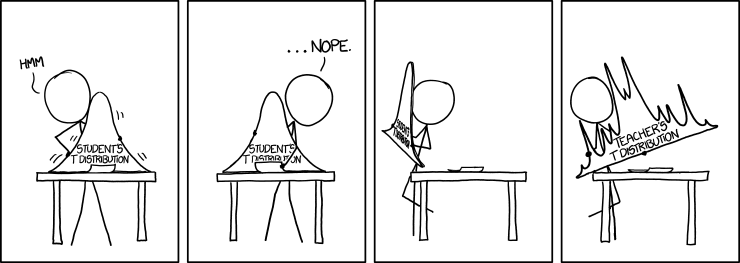

In [7]:
#hide
xkcd = """https://imgs.xkcd.com/comics/t_distribution.png"""
from IPython.display import Image, HTML
Image(xkcd) 

In [19]:
from random import choice
coin = [1 , 0] # 1 is heads 0 is tails
N = 100000
sum_of_heads = []
for i in range(N):
    flips = [] 
    for _ in range(100):
        flips.append(choice(coin)) 
    sum_of_heads.append(sum(flips))
len(list(filter(lambda x:x>=69, sum_of_heads)))/N

3e-05

In [50]:
#hide
fig = px.histogram(sum_of_heads, width=700, height=350)
fig.add_vrect(x0=69, x1=80, opacity=0.1, fillcolor="green")

fig.update_layout(
    xaxis_title="Number of HEADS",
    yaxis_title="Count",
    showlegend=False,
    font=dict(
        family="Courier New, monospace",
        size=13,
        color="black"
    )
)

the green dotted line is 69

As we see here, the probability that we get this data (69 heads) if the coin was fair is 0.00087 (and this is what’s called a P-value).

Another solution:
Normally for these problems, I’ll use numpy whenever I can for faster execution🏃🏽🏃🏽.

In [58]:
import numpy as np

n = 10000
flips_num = 100
sims = np.random.choice([1,0], size=n*flips_num).reshape(flips_num, n).sum(axis=0)

sum(sims >= 69)/n

3e-05

This solution is orders of magnitudes faster than the first one. 

What I did here is simulated all the flips (N*100), then reshaped the 1D array into a 2D one with the shape (100, N), and I took the sum of each row.

Example:

We have a box that contains three coins. Coin 1 is standard, Coin 2 has two heads and Coin 3 is rigged so that the probability of getting heads is 1/3. A coin is randomly selected from the box and thrown into the air. 

    - (a) Find the probability of obtaining a result of heads.
    - (b) What is the probability that the coin is two-headed if the 

coin selected is known to be head? Again, if we reframed the problem it’s intuitive how to go about simulating it.
    If we have simulate each coin as a probability of heads [0.5,1,1/3] and we randomly select a probability (p) of the list of these probabilities/coins N number of times, what’s the % of times that we will get heads? 
    And of those times what’s the % of times that we will get the probability of 1 (two headed coin)

Explaining random np.random.choice p argument. 
p is the probabilities associated with each value in a. 
So if we have a = [‘tails’, ‘heads’] and p = [0,1] that means we will always select heads, and if p=[0.1, 0.9] that means that 9 out of 10 times we will select heads.(if you run enough simulation)
    ** the probabilities must add up to 1

Again, if we reframed the problem it’s intuitive how to go about simulating it.
If we have simulated each coin as a probability of heads [0.5,1,0.33333] and we randomly select a probability (p) of the list of these probabilities/coins N number of times, what’s the % of times that we will get heads? 
And of those times what’s the % of times that we will get the probability of 1 (two-headed coin)

And to answer this question what we can do is this:

randomly choosing a coin from the box(randomly choosing a probability of heads from the proba_of_heads list) size here is N;


loop over the probabilities and flip a coin using whatever coin you selected. (notice that probability of tails = probability of 1-heads);
    if heads are selected (1) increase heads by one;
    if it was a two-headed coin (probability of heads =1) increase two_headed by one:
    - proba of heads is going to be heads/N
    - proba of two-headed given headed is going to be two_headed/heads.

In [ ]:
N = 1000000
proba_of_heads = [0.5, 1, 1/3]
heads = 0
two_headed = 0
random_coin_proba = np.random.choice(proba_of_heads, size=N)
for c in random_coin_proba:
    if np.random.choice(a=[0,1], p=(1-c, c)):
        heads += 1
        if c == 1:
            two_headed += 1

In [63]:
print(f"(a) proba of heads is {heads/N}. \n(b) proba of two headed given heads is {two_headed/heads}")

(a) proba of heads is 0.610904. 
(b) proba of two headed given heads is 0.5460661576941712
